In [75]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from math import log2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [22]:
from IPython.display import SVG, display
from graphviz import Source
import dtreeplot

In [23]:
from IPython.display import HTML

style = "<style>svg{width: 100% !important;height: 100% !important;}</style>"
HTML(style)

In [13]:
titanic_data = pd.read_csv('titanic/train.csv')

In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
X = titanic_data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived

In [16]:
X = pd.get_dummies(X)
X = X.fillna({"Age": X.Age.median()})

In [32]:
tree_titanic = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [18]:
tree_titanic.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

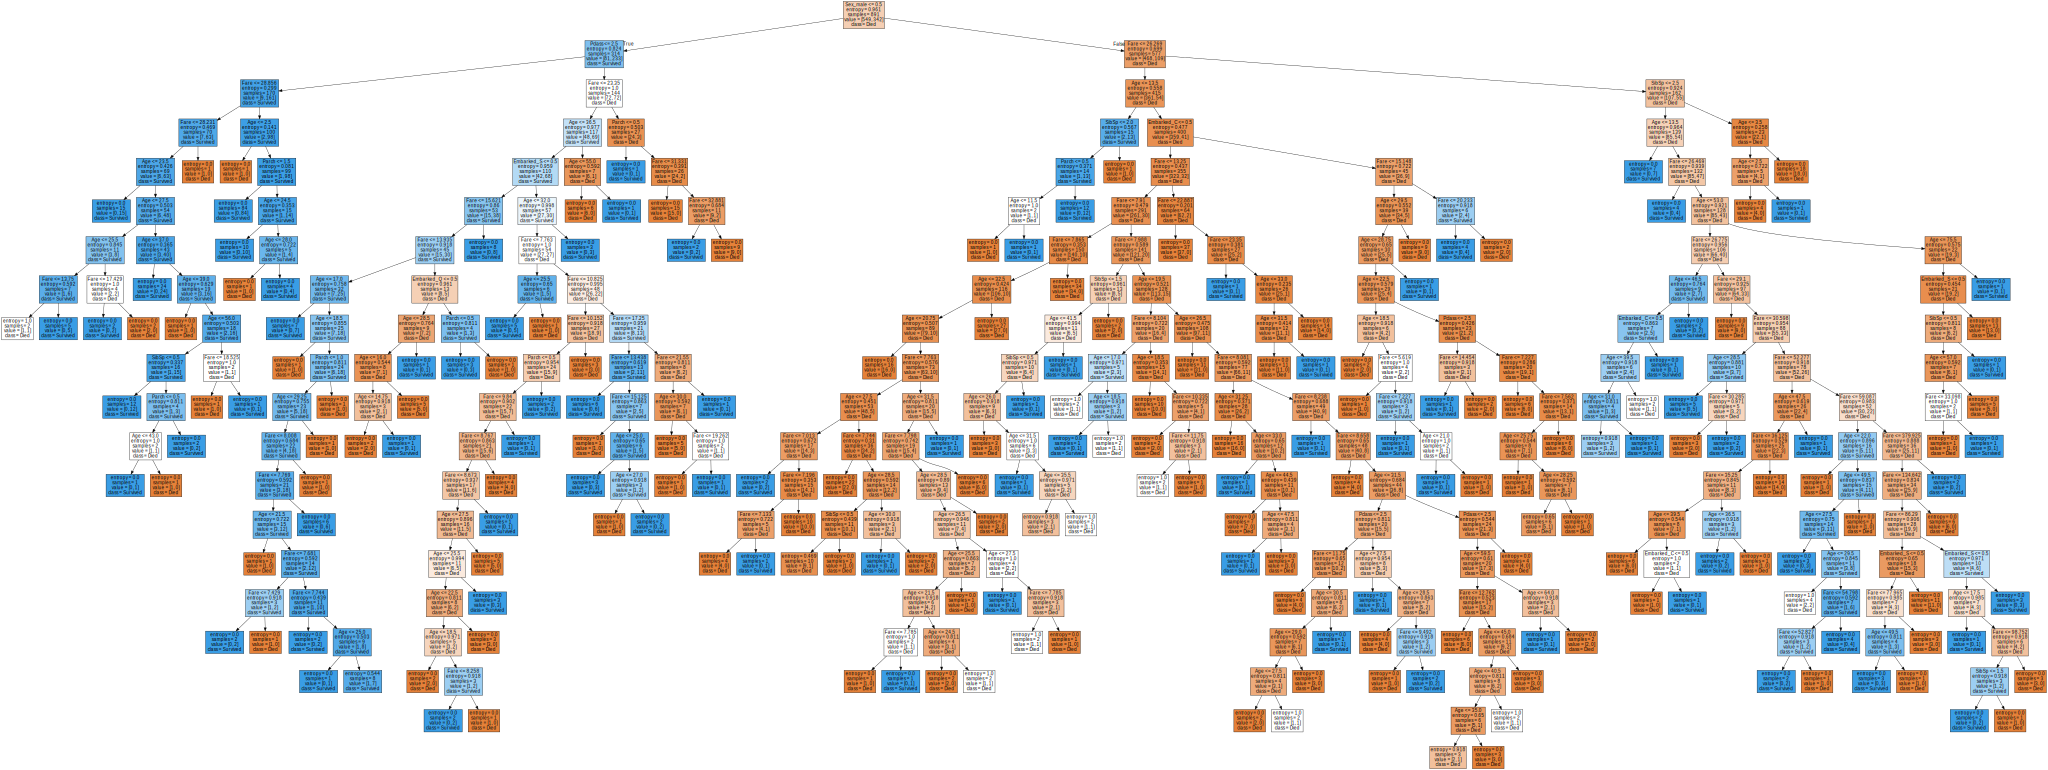

In [20]:
graph = Source(
    tree.export_graphviz(tree_titanic, out_file=None, feature_names=list(X), class_names=["Died", "Survived"],
                         filled=True))
display(SVG(graph.pipe(format='svg')))


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
tree_titanic = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [37]:
tree_titanic.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
tree_titanic.score(X_train, y_train)

0.8238255033557047

In [39]:
tree_titanic.score(X_test, y_test)

0.8203389830508474

In [64]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    tree_titanic = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    tree_titanic.fit(X_train, y_train)
    train_score = tree_titanic.score(X_train, y_train)
    test_score = tree_titanic.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(tree_titanic, X_train, y_train, cv=5).mean()

    temp_df = pd.DataFrame({"max_depth": [max_depth], "train_score": [test_score], "test_score": [train_score],
                            "cross_val_score": mean_cross_val_score})
    scores_data = scores_data.append(temp_df)

In [66]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.796610,0.781879,0.781961
0,2,0.776271,0.805369,0.770196
0,3,0.820339,0.823826,0.790322
0,4,0.823729,0.833893,0.788627
0,5,0.806780,0.840604,0.803754
...,...,...,...,...
0,95,0.772881,0.979866,0.770182
0,96,0.766102,0.979866,0.765126
0,97,0.766102,0.979866,0.773543
0,98,0.766102,0.979866,0.766835


In [69]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score", "cross_val_score"],
                           var_name="set_type", value_name="score")

In [70]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.796610
1,2,train_score,0.776271
2,3,train_score,0.820339
3,4,train_score,0.823729
4,5,train_score,0.806780
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.765126
294,97,cross_val_score,0.773543
295,98,cross_val_score,0.766835


<AxesSubplot:xlabel='max_depth', ylabel='score'>

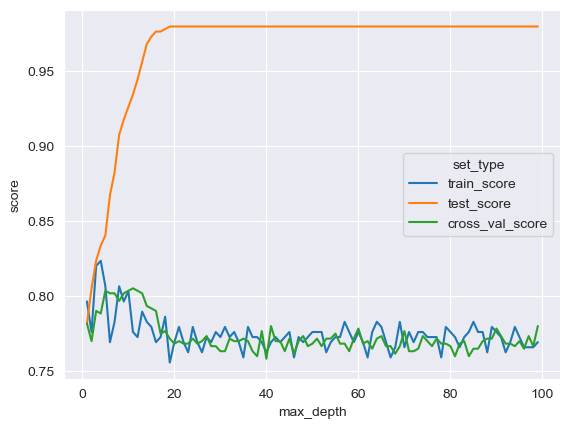

In [71]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [ ]:
tree_titanic = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [63]:
cross_val_score(tree_titanic, X_train, y_train, cv=5).mean()

0.7701960784313725

In [72]:
scores_data_long.query("set_type == 'cross_val_score'")

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.803754
...,...,...,...
292,95,cross_val_score,0.770182
293,96,cross_val_score,0.765126
294,97,cross_val_score,0.773543
295,98,cross_val_score,0.766835


In [73]:
best_tree_titanic = tree.DecisionTreeClassifier(criterion="entropy", max_depth=11)

In [74]:
cross_val_score(best_tree_titanic, X_test, y_test, cv=5).mean()

0.7932203389830509

In [83]:
np.random.seed(0)
iris_train = pd.read_csv("train_iris.csv")
X_train = iris_train.drop("species", axis=1)
y_train = iris_train["species"]

iris_test = pd.read_csv("test_iris.csv")
X_test = iris_test.drop("species", axis=1)
y_test = iris_test["species"]
max_depthes = range(1, 100)

iris_df = pd.DataFrame()

In [87]:
for i in max_depthes:
    iris_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    iris_clf.fit(X_train, y_train)
    train_score = iris_clf.score(X_train, y_train)
    test_score = iris_clf.score(X_test, y_test)

    cross_score = cross_val_score(iris_clf, X_train, y_train, cv=5)

    temp_df = pd.DataFrame(
        {"depth": i, "train_score": train_score, "test_score": test_score, "cross_score": cross_score})
    iris_df = iris_df.append(temp_df)

C:\Users\fedkov.r\AppData\Local\Temp\ipykernel_16304\880260897.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_df = iris_df.append(temp_df)
C:\Users\fedkov.r\AppData\Local\Temp\ipykernel_16304\880260897.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_df = iris_df.append(temp_df)
C:\Users\fedkov.r\AppData\Local\Temp\ipykernel_16304\880260897.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_df = iris_df.append(temp_df)
C:\Users\fedkov.r\AppData\Local\Temp\ipykernel_16304\880260897.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_df = iris_df.append(temp_df)
C:\Users\fedkov.r\AppData\Local\Temp\ipykern

In [89]:
iris_df = pd.melt(iris_df,id_vars=["depth"], value_vars=["train_score", "test_score", "cross_score"], var_name="score_type", value_name="score")

In [90]:
iris_df

,depth,score_type,score
0,1,train_score,0.70
1,1,train_score,0.70
2,1,train_score,0.70
3,1,train_score,0.70
4,1,train_score,0.70
...,...,...,...
1480,99,cross_score,0.95
1481,99,cross_score,0.95
1482,99,cross_score,1.00
1483,99,cross_score,1.00


<AxesSubplot:xlabel='depth', ylabel='score'>

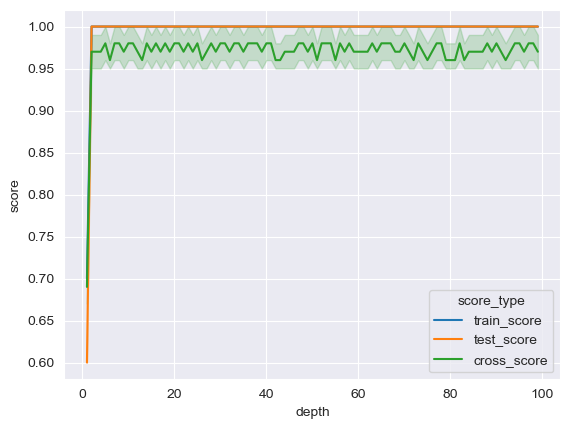

In [92]:
sns.lineplot(x="depth", y="score", hue="score_type", data=iris_df)